In [258]:
import pandas as pd
from web3 import Web3

from mainnet_launch.constants import *

from mainnet_launch.database.schema.full import (
    AutopoolDeposit,
    AutopoolTransfer,
    AutopoolWithdrawal,
    Transactions,
    Blocks,
)
from mainnet_launch.database.schema.postgres_operations import get_full_table_as_df


deposit_df = get_full_table_as_df(AutopoolDeposit)
withdrawal_df = get_full_table_as_df(AutopoolWithdrawal)
transfer_df = get_full_table_as_df(AutopoolTransfer)
blocks_df = get_full_table_as_df(Blocks)
tx_df = get_full_table_as_df(Transactions)

In [259]:
tx_hash_to_block = tx_df.set_index("tx_hash")["block"].to_dict()
block_number_to_datetime = blocks_df.set_index("block")["datetime"].to_dict()
trasactions_hash_to_eoa = tx_df.set_index("tx_hash")["from_address"].to_dict()

for df in [deposit_df, withdrawal_df, transfer_df]:
    df["block"] = df["tx_hash"].map(tx_hash_to_block)
    df["datetime"] = df["block"].map(block_number_to_datetime)
    df["eao_from_address"] = df["tx_hash"].map(trasactions_hash_to_eoa)

In [260]:
deposit_df.sort_values(by=["datetime"], inplace=True)
base_eth_deposits = deposit_df[deposit_df["autopool_vault_address"] == BASE_ETH.autopool_eth_addr].copy()
base_eth_withdrawals = withdrawal_df[withdrawal_df["autopool_vault_address"] == BASE_ETH.autopool_eth_addr].copy()
base_eth_transfers = transfer_df[transfer_df["autopool_vault_address"] == BASE_ETH.autopool_eth_addr].copy()
base_eth_transfers["block"] = base_eth_transfers["tx_hash"].map(tx_hash_to_block)

base_eth_mints = base_eth_transfers[base_eth_transfers["from_address"] == ZERO_ADDRESS][
    ["tx_hash", "from_address", "to_address", "value"]
].copy()

base_eth_df = pd.merge(base_eth_deposits, base_eth_mints, on="tx_hash")
real_mints = base_eth_df[base_eth_df["assets"] > 0].copy()
naive_mints = real_mints[real_mints["eoa_from_address"] == real_mints["to_address"]].copy()
strange_mints = real_mints[real_mints["eoa_from_address"] != real_mints["to_address"]].copy()
naive_mints["shares"].sum(), strange_mints["shares"].sum()  # strange is 60%, so it is the standard way

KeyError: 'eoa_from_address'

In [ ]:
real_base_eth_deposits = base_eth_deposits[base_eth_deposits["assets"] > 0].copy()
real_base_eth_deposits

,autopool_vault_address,tx_hash,log_index,chain_id,shares,assets,sender,owner,block,datetime,eoa_from_address
1217,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0xadf67a3dd1b7bb8c59f818d7f04e65f7f90963c90bce...,336,8453,1.000000e-13,1.000000e-13,0x78A7c45E3cC7B9567b4803AEAF9b33bC8c898451,0x000000000000000000000000000000000000dEaD,21241103,2024-10-18 17:12:33+00:00,0xba5e4322fe1c3c23Cb74304fE9537bF54a6B781E
2573,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0xb00590b29e59ccd29ec875904dc1dcc00e0a792ea299...,69,8453,1.000000e-03,1.000000e-03,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x09618943342c016A85aC0F98Fd005479b3cec571,21417939,2024-10-22 19:27:05+00:00,0x09618943342c016A85aC0F98Fd005479b3cec571
3667,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0x4138e2ee96d62376bdcb75f6b59b168d666165b0082e...,85,8453,9.960205e-04,9.960205e-04,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,21418088,2024-10-22 19:32:03+00:00,0x09618943342c016A85aC0F98Fd005479b3cec571
6025,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0xc46da0cf7e255e7d04ae34bf6241e50546bf1579cb78...,113,8453,1.000000e-02,1.000000e-02,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,21979155,2024-11-04 19:14:17+00:00,0x09618943342c016A85aC0F98Fd005479b3cec571
474,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0x77262c96a4c43dadb94ad3b59b6809eb67f8c9d5246a...,258,8453,1.000000e-03,1.000000e-03,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x094Ac14375f21FC2Dd89df39fb9E36574Da1b580,22024837,2024-11-05 20:37:01+00:00,0x094Ac14375f21FC2Dd89df39fb9E36574Da1b580
...,...,...,...,...,...,...,...,...,...,...,...
5653,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0xe0605e93e2107cb9615cd021018cbbae439a37385bb6...,467,8453,9.661331e-03,1.004621e-02,0x4D2b87339b1f9e480aA84c770fa3604D7D40f8DF,0x4D2b87339b1f9e480aA84c770fa3604D7D40f8DF,34825464,2025-08-29 04:04:35+00:00,0x5146B43ae9fD7c28AE40c79F321465a069Ea4263
6413,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0x6efc1cacf41ad4e865aeb8e2bc5c708d6cf8af83ca0a...,284,8453,6.633303e-04,6.900000e-04,0x4D2b87339b1f9e480aA84c770fa3604D7D40f8DF,0xbD0F479cbd55643A6eCa23974E5380C4Fa50146D,34877719,2025-08-30 09:06:25+00:00,0xE831868375F4B2D7D775aef1d3d441Ad75c11844
2761,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0xe8efc9a3dea9b3ed08cb559d9a89968c391c41afffad...,269,8453,3.460356e+00,3.600000e+00,0x4D2b87339b1f9e480aA84c770fa3604D7D40f8DF,0x188715f8b5371e5f8002edb6C9583AEd78ebD096,34926996,2025-08-31 12:28:59+00:00,0x188715f8b5371e5f8002edb6C9583AEd78ebD096
1437,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0x79789c3fef3247b4443c8b8982f170704df78697279a...,378,8453,1.333254e-02,1.387398e-02,0x4D2b87339b1f9e480aA84c770fa3604D7D40f8DF,0x4D2b87339b1f9e480aA84c770fa3604D7D40f8DF,34963843,2025-09-01 08:57:13+00:00,0xB8e160612aD814a294313bc77FBE67F38b67ccDc


In [ ]:
real_base_eth_deposits["sender"].value_counts()
# deposit .sender() = often the router top 3 are the router

sender
0x71761bf6512BC76FB7169D3fa25E83EF5c85F816    645
0xa18B89225491230fDb1883cFbda65E7931606931    201
0x4D2b87339b1f9e480aA84c770fa3604D7D40f8DF    137
0x3A43AEC53490CB9Fa922847385D82fe25d0E9De7     14
0x391976D9Cd4e7Af3E4FD6De7fCC8c8CFfAD7F593      4
0x78A7c45E3cC7B9567b4803AEAF9b33bC8c898451      1
0x61e789DD14B73d0730db7EB2d67300577ae0dBA4      1
Name: count, dtype: int64

In [ ]:
real_base_eth_deposits[real_base_eth_deposits["owner"] == "0x71761bf6512BC76FB7169D3fa25E83EF5c85F816"]

,autopool_vault_address,tx_hash,log_index,chain_id,shares,assets,sender,owner,block,datetime,eoa_from_address
3667,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0x4138e2ee96d62376bdcb75f6b59b168d666165b0082e...,85,8453,0.000996,0.000996,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,21418088,2024-10-22 19:32:03+00:00,0x09618943342c016A85aC0F98Fd005479b3cec571
6025,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0xc46da0cf7e255e7d04ae34bf6241e50546bf1579cb78...,113,8453,0.010000,0.010000,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,21979155,2024-11-04 19:14:17+00:00,0x09618943342c016A85aC0F98Fd005479b3cec571
2539,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0x9e348e702b9ab30c8abd0bc5079e5fca272d7cc1db2b...,324,8453,0.001000,0.001000,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,22364919,2024-11-13 17:33:05+00:00,0x09618943342c016A85aC0F98Fd005479b3cec571
5815,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0x871b603eb4a9b4595ecba944cc3bdaf2cdf9cfe50754...,271,8453,0.001000,0.001000,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,22367302,2024-11-13 18:52:31+00:00,0x09618943342c016A85aC0F98Fd005479b3cec571
5276,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0x0afc1debe0e4526f267c4f7626489055d8d4186af898...,183,8453,0.409893,0.410000,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,22370098,2024-11-13 20:25:43+00:00,0xCB297FeE1D16a396502D94Ba99970810c7587946
...,...,...,...,...,...,...,...,...,...,...,...
3228,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0x2eaf2bcce16661004e1b2a3b97a00af69cc3ecce11ee...,417,8453,0.213590,0.216476,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,25701827,2025-01-29 23:23:21+00:00,0x3BBF5B5e873543dc90bCaEe9BC98bd8CcD06e60f
592,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0x08730428f04868c19872459e840701c834d409c62acd...,251,8453,0.108561,0.110000,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,25782990,2025-01-31 20:28:47+00:00,0x9cC48736913f09719AEAAA5782CEd5C689E1469F
5826,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0x9076fd3ccd5833f8930c456c64134e8ec4d42af6c20b...,333,8453,0.016793,0.017000,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,25872008,2025-02-02 21:56:03+00:00,0xbAb8A941b657c39D782A07DDaB3dAbEF9D0a13FD
3780,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0x629b1a4344d724d3f17bf488f9dade3a7eb8c3c0ab66...,414,8453,71.470783,72.100000,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,25926398,2025-02-04 04:09:03+00:00,0xD21A227d7a5C9d475De1A293CFb07dD9Fa0FcEB0


In [ ]:
real_base_eth_deposits.groupby("eoa_from_address")["assets"].sum().sort_values(ascending=False)
base_eth_withdrawals.groupby("eoa_from_address")["assets"].sum().sort_values(ascending=False)

deposits_sum = real_base_eth_deposits.groupby("eoa_from_address")["assets"].sum()
deposits_sum = deposits_sum * -1

withdrawals_sum = base_eth_withdrawals.groupby("eoa_from_address")["assets"].sum()

combined = pd.concat([deposits_sum.rename("deposits"), withdrawals_sum.rename("withdrawals")], axis=1)
combined.fillna(0, inplace=True)
combined["net"] = combined["deposits"] + combined["withdrawals"]
combined.sort_values("deposits")

,deposits,withdrawals,net
eoa_from_address,,,
0xFda1215797D29414E588B2e62fC390Ee2949aaAA,-6.395208e+02,6.015637e+02,-3.795709e+01
0x0A5e1Db3671faCcD146404925bDa5c59929f66c3,-2.358400e+02,2.364198e+02,5.797915e-01
0xFa07d3490eeAD396C9EfCb10092Ed86c6b914378,-2.060000e+02,2.062261e+02,2.260615e-01
0x5F58C795dEf173e3B4c8d760d2af1BCAAa5Fdc2D,-1.820000e+02,1.818163e+02,-1.836599e-01
0xF0bBfB6B0D222E0D065538546d20302298752446,-1.809000e+02,9.640060e+01,-8.449940e+01
...,...,...,...
0x30BA9c99BF5f25C022E1ebF20508C87342FE5911,-1.000000e-16,1.000000e-17,-9.000000e-17
0x06f11A6D7bC91897c63Dc61613974be1c2d12eD5,0.000000e+00,3.307442e-01,3.307442e-01
0x6c9D96942E4dc17D558E13CE679D197ea9B579f1,0.000000e+00,5.098382e-03,5.098382e-03


In [ ]:
user = "0xFda1215797D29414E588B2e62fC390Ee2949aaAA"

guy = (
    transfer_df[
        ((transfer_df["from_address"] == user) | (transfer_df["to_address"] == user))
        & (transfer_df["autopool_vault_address"] == BASE_ETH.autopool_eth_addr)
    ]
    .copy()
    .sort_values("datetime")
)

# 1st, is withdraw from staked contract
# second is with
guy

,tx_hash,log_index,chain_id,autopool_vault_address,from_address,to_address,value,block,datetime,eao_from_address
19153,0xca07b4cf3283e405c2d424107a99e7333cab47035d5c...,174,8453,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0xb592c1539AC22EdD9784eA4d6a22199C16314498,0xFda1215797D29414E588B2e62fC390Ee2949aaAA,319.523888,22426005,2024-11-15 03:29:17+00:00,0xFda1215797D29414E588B2e62fC390Ee2949aaAA
11310,0xe12cefd168ae4592726e88f00882a511ea04cb1ddbea...,283,8453,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0xFda1215797D29414E588B2e62fC390Ee2949aaAA,0x0000000000000000000000000000000000000000,319.523888,22426025,2024-11-15 03:29:57+00:00,0xFda1215797D29414E588B2e62fC390Ee2949aaAA
21034,0x29005e5f48e6c755f5b7810c4301bb9ab44b75ad1007...,191,8453,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0xb592c1539AC22EdD9784eA4d6a22199C16314498,0xFda1215797D29414E588B2e62fC390Ee2949aaAA,316.174023,24496248,2025-01-02 01:37:23+00:00,0xFda1215797D29414E588B2e62fC390Ee2949aaAA
29160,0xd1ba46e2080acf38684f402284e2b4196af7a753f2bb...,289,8453,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0xFda1215797D29414E588B2e62fC390Ee2949aaAA,0x0000000000000000000000000000000000000000,316.174023,24496286,2025-01-02 01:38:39+00:00,0xFda1215797D29414E588B2e62fC390Ee2949aaAA


In [ ]:
user

'0xFda1215797D29414E588B2e62fC390Ee2949aaAA'

In [265]:
withdrawal_df["actualized_nav_per_share"] = withdrawal_df["assets"] / withdrawal_df["shares"]
withdrawal_df.sort_values("actualized_nav_per_share", ascending=True)[
    ["datetime", "assets", "shares", "actualized_nav_per_share"]
]

,datetime,assets,shares,actualized_nav_per_share
3005,2025-08-28 04:47:31+00:00,0.000003,0.000004,0.768296
131,2025-01-02 01:38:39+00:00,281.574363,316.174023,0.890568
2833,2024-10-06 17:04:11+00:00,113.470765,113.957819,0.995726
2186,2024-10-17 10:08:47+00:00,119.927564,120.400451,0.996072
3562,2024-10-22 12:44:59+00:00,160.873420,161.467162,0.996323
...,...,...,...,...
718,2025-08-24 17:53:59+00:00,13.511610,12.891089,1.048136
266,2025-08-26 09:23:35+00:00,3.710493,3.540000,1.048162
1683,2025-09-02 13:42:47+00:00,0.019922,0.019000,1.048527
2116,2025-09-03 03:51:59+00:00,0.009874,0.009416,1.048673


In [ ]:
withdrawal_df[withdrawal_df["owner"] == user]

,autopool_vault_address,tx_hash,log_index,chain_id,shares,assets,sender,receiver,owner,block,datetime,eoa_from_address,eao_from_address
131,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0xd1ba46e2080acf38684f402284e2b4196af7a753f2bb...,290,8453,316.174023,281.574363,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0xFda1215797D29414E588B2e62fC390Ee2949aaAA,0xFda1215797D29414E588B2e62fC390Ee2949aaAA,24496286,2025-01-02 01:38:39+00:00,0xFda1215797D29414E588B2e62fC390Ee2949aaAA,0xFda1215797D29414E588B2e62fC390Ee2949aaAA
1530,0xE800e3760FC20aA98c5df6A9816147f190455AF3,0x0bb7eadd16543eacbf7bfb719aa9a81908022cae3afb...,230,1,100.000000,100.193305,0xC45e939ca8C43822A2A233404Ecf420712084c30,0xC45e939ca8C43822A2A233404Ecf420712084c30,0xFda1215797D29414E588B2e62fC390Ee2949aaAA,21003261,2024-10-20 00:39:47+00:00,0xFda1215797D29414E588B2e62fC390Ee2949aaAA,0xFda1215797D29414E588B2e62fC390Ee2949aaAA
2405,0xE800e3760FC20aA98c5df6A9816147f190455AF3,0x58d07f2e1acad50698bb8ec340cdf5e5f6fbcb1b306b...,128,1,288.875839,289.478223,0xC45e939ca8C43822A2A233404Ecf420712084c30,0xC45e939ca8C43822A2A233404Ecf420712084c30,0xFda1215797D29414E588B2e62fC390Ee2949aaAA,21046069,2024-10-25 23:58:35+00:00,0xFda1215797D29414E588B2e62fC390Ee2949aaAA,0xFda1215797D29414E588B2e62fC390Ee2949aaAA
2711,0x0A2b94F6871c1D7A32Fe58E1ab5e6deA2f114E56,0x7ff184343308ef05ecf9cc77f43c7d1294f2f019ce04...,251,1,131.875272,132.026732,0xC45e939ca8C43822A2A233404Ecf420712084c30,0xC45e939ca8C43822A2A233404Ecf420712084c30,0xFda1215797D29414E588B2e62fC390Ee2949aaAA,20900380,2024-10-05 15:58:23+00:00,0xFda1215797D29414E588B2e62fC390Ee2949aaAA,0xFda1215797D29414E588B2e62fC390Ee2949aaAA
3098,0xE800e3760FC20aA98c5df6A9816147f190455AF3,0xf24992ee03a28cf73b0f96dd19431bcd7a2fc04660d8...,152,1,134.545250,134.813606,0xC45e939ca8C43822A2A233404Ecf420712084c30,0xC45e939ca8C43822A2A233404Ecf420712084c30,0xFda1215797D29414E588B2e62fC390Ee2949aaAA,21006514,2024-10-20 11:32:35+00:00,0xFda1215797D29414E588B2e62fC390Ee2949aaAA,0xFda1215797D29414E588B2e62fC390Ee2949aaAA
3387,0x0A2b94F6871c1D7A32Fe58E1ab5e6deA2f114E56,0xcc848ad69081caf56f1e3eef7f87c4ca1d63dcb1f792...,295,1,131.846326,131.985780,0xC45e939ca8C43822A2A233404Ecf420712084c30,0xC45e939ca8C43822A2A233404Ecf420712084c30,0xFda1215797D29414E588B2e62fC390Ee2949aaAA,20931591,2024-10-10 00:21:59+00:00,0xFda1215797D29414E588B2e62fC390Ee2949aaAA,0xFda1215797D29414E588B2e62fC390Ee2949aaAA
3592,0xE800e3760FC20aA98c5df6A9816147f190455AF3,0x6489ea9d89ec01f3919b1531c8dae396b0a4c077e4cf...,369,1,233.632775,234.048403,0xC45e939ca8C43822A2A233404Ecf420712084c30,0xC45e939ca8C43822A2A233404Ecf420712084c30,0xFda1215797D29414E588B2e62fC390Ee2949aaAA,21002732,2024-10-19 22:53:47+00:00,0xFda1215797D29414E588B2e62fC390Ee2949aaAA,0xFda1215797D29414E588B2e62fC390Ee2949aaAA
3641,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0xe12cefd168ae4592726e88f00882a511ea04cb1ddbea...,284,8453,319.523888,319.989300,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0xFda1215797D29414E588B2e62fC390Ee2949aaAA,0xFda1215797D29414E588B2e62fC390Ee2949aaAA,22426025,2024-11-15 03:29:57+00:00,0xFda1215797D29414E588B2e62fC390Ee2949aaAA,0xFda1215797D29414E588B2e62fC390Ee2949aaAA


In [ ]:
316.1740234024038
# I thiink it is correct they put in a 316.1740234024038 shares and got out assets 281.57436296603277

# because they had to pull directly from a bunch of locations,

# https://basescan.org/tx/0xd1ba46e2080acf38684f402284e2b4196af7a753f2bbb7fb8c0ff9f5304b2080

In [ ]:
# 1.00144, nav per share on nov 15
# 319.989299615583326268 / 1.00144
# looks fine

# the second one was on Jan 2 (matches the date of disaster)

In [ ]:
# 0xFda1215797D29414E588B2e62fC390Ee2949aaAA did this user get hosed?

# theory this user: 0xF0bBfB6B0D222E0D065538546d20302298752446 should have 90 baseETH here and they do

In [ ]:
base_eth_main_rewarder = "0xAADf01DD90aE0A6Bb9Eb908294658037096E0404"

from multicall import Call

rewa

# I want to understand this chart

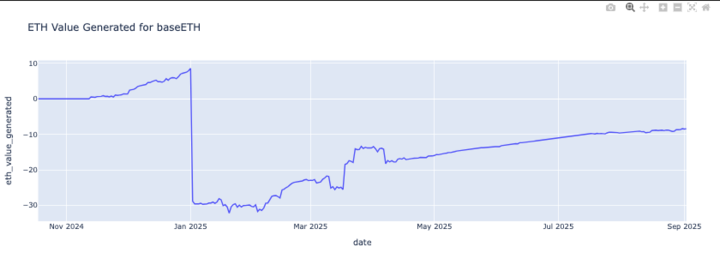



who made and lost money from this?

In [ ]:
# maybe I can get it form the router?

from mainnet_launch.abis import 

SyntaxError: invalid syntax (1040332007.py, line 3)

In [ ]:
# deposit() owner == the autopilot router, sometimes,

In [ ]:
strange_mints[["eoa_from_address"]].value_counts().reset_index()

,eoa_from_address,count
0,0x7798Ba9512B5A684C12e31518923Ea4221A41Fb9,19
1,0xFa07d3490eeAD396C9EfCb10092Ed86c6b914378,14
2,0x61fdff48D154c6079E43CBf14027057b367cb3b2,11
3,0xaF2a082188aD55993c0FBF1e067c01F27Cc69E1d,10
4,0x4371eBAAefEb8e56ea8448787508EfeFa2291d74,9
...,...,...
230,0x6FA6801e7e4317136385b4473cf029bc26DdB9ee,1
231,0x6b6657a973644faaff1c5162D53C790C7E6a986d,1
232,0x700d4EABCe794e75637564211C0DF62701Db59ac,1
233,0x70aA20c95543153a891a7865648ACE84de73B75C,1


In [ ]:
strange_mints[["sender", "owner", "to_address", "eoa_from_address"]].value_counts().reset_index()

,sender,owner,to_address,eoa_from_address,count
0,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x7798Ba9512B5A684C12e31518923Ea4221A41Fb9,19
1,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0xFa07d3490eeAD396C9EfCb10092Ed86c6b914378,12
2,0x4D2b87339b1f9e480aA84c770fa3604D7D40f8DF,0x4D2b87339b1f9e480aA84c770fa3604D7D40f8DF,0x4D2b87339b1f9e480aA84c770fa3604D7D40f8DF,0xaF2a082188aD55993c0FBF1e067c01F27Cc69E1d,10
3,0xa18B89225491230fDb1883cFbda65E7931606931,0xa18B89225491230fDb1883cFbda65E7931606931,0xa18B89225491230fDb1883cFbda65E7931606931,0x61fdff48D154c6079E43CBf14027057b367cb3b2,10
4,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x4371eBAAefEb8e56ea8448787508EfeFa2291d74,8
...,...,...,...,...,...
249,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0xC3493323a9251Ca4c773D715Dd5E96A05D6b03Bd,1
250,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0xC5f6B52BdABce080A68b49E80eA264699c174882,1
251,0x4D2b87339b1f9e480aA84c770fa3604D7D40f8DF,0xbD0F479cbd55643A6eCa23974E5380C4Fa50146D,0xbD0F479cbd55643A6eCa23974E5380C4Fa50146D,0xE831868375F4B2D7D775aef1d3d441Ad75c11844,1
252,0x4D2b87339b1f9e480aA84c770fa3604D7D40f8DF,0xF7AdAf78ffe77D69D88762dd7C10924873d4F6E9,0xF7AdAf78ffe77D69D88762dd7C10924873d4F6E9,0xc2212d2033F3bf0FDb9F11fA13fe6a260aA76D5d,1


In [ ]:
some_user = "0xa18B89225491230fDb1883cFbda65E7931606931"

main_rewarder = "0xb592c1539AC22EdD9784eA4d6a22199C16314498"

to_rewarder = base_eth_transfers[base_eth_transfers["to_address"] == main_rewarder]
from_rewarder = base_eth_transfers[base_eth_transfers["from_address"] == main_rewarder]

to_rewarder[to_rewarder["from_address"] == some_user]

,tx_hash,log_index,chain_id,autopool_vault_address,from_address,to_address,value,block
7510,0x1754f62c2b314710ccca74a3c4ed90fc2ef855bd672b...,186,8453,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0xa18B89225491230fDb1883cFbda65E7931606931,0xb592c1539AC22EdD9784eA4d6a22199C16314498,3.426307,26994260
7635,0x7347325b707cc227beda6110a7069045b93899dbb477...,229,8453,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0xa18B89225491230fDb1883cFbda65E7931606931,0xb592c1539AC22EdD9784eA4d6a22199C16314498,9.235373,30090879
7814,0x8677a8267f82172439911c83a3b6d337c47581f98510...,370,8453,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0xa18B89225491230fDb1883cFbda65E7931606931,0xb592c1539AC22EdD9784eA4d6a22199C16314498,0.155835,29053447
7842,0x36577eab240d4c12b3cef4ac6c9b832b30aa5ebdfdc2...,345,8453,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0xa18B89225491230fDb1883cFbda65E7931606931,0xb592c1539AC22EdD9784eA4d6a22199C16314498,0.013615,28281090
8102,0x1808a61ec175fbd050c2276f8ff6a8fd3373ffa594b4...,97,8453,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0xa18B89225491230fDb1883cFbda65E7931606931,0xb592c1539AC22EdD9784eA4d6a22199C16314498,0.979274,27264059
...,...,...,...,...,...,...,...,...
31969,0xb548c3c76202638d36e7386b2783a0ad302af65770bc...,197,8453,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0xa18B89225491230fDb1883cFbda65E7931606931,0xb592c1539AC22EdD9784eA4d6a22199C16314498,27.676943,28905796
32079,0x176e1e0222cfa07dd839a225630c1a0f116f33b3a6ff...,534,8453,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0xa18B89225491230fDb1883cFbda65E7931606931,0xb592c1539AC22EdD9784eA4d6a22199C16314498,24.455725,27404464
32162,0xe2a7ef9d29d3f0481c7d0883e22a6740200196980549...,133,8453,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0xa18B89225491230fDb1883cFbda65E7931606931,0xb592c1539AC22EdD9784eA4d6a22199C16314498,62.308215,27310424
32413,0x0c62e81e60e094f9cce4e0ab891d07da029902967e49...,162,8453,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0xa18B89225491230fDb1883cFbda65E7931606931,0xb592c1539AC22EdD9784eA4d6a22199C16314498,0.001249,26385040


In [ ]:
# can we do maxWithdraw? on baseETH?

# function maxWithdraw(address owner) public view returns (uint256 maxAssets) /* Returns the maximum number of assets that can be withdrawn for the owner according to the ERC-4626 tokenized vault standard. */
# Use Case: To see how much of the vault's assets the owner can withdraw.
# */

In [ ]:
# I'm having trouble idenifying the benificial owner

In [ ]:
base_eth_withdrawals[
    "owner"
].value_counts()  # sender is not interesting, it is always the autopool router, or yo ETH (3rd party)

owner
0x09618943342c016A85aC0F98Fd005479b3cec571    14
0xF0bBfB6B0D222E0D065538546d20302298752446    14
0xFa07d3490eeAD396C9EfCb10092Ed86c6b914378    11
0x20E0142F15E4500913e61cA87e3Ac4EDe0B1b4d0     8
0x3A43AEC53490CB9Fa922847385D82fe25d0E9De7     6
                                              ..
0x77fBe60271fA66632b633FF82ad766d9a7CB9719     1
0x3A619a042ad04D9AE03c6bBB7262ADf8769d9137     1
0x1C55D9c365F9cB5f09a6F98843F08C764a8F0f1D     1
0xD5d3761D06038860C5ACB8862114EE27E20695D6     1
0x7e8B929aa93D9975c8E75E0F65cb04cbF62cDB44     1
Name: count, Length: 331, dtype: int64

In [ ]:
strange_mints

,autopool_vault_address,tx_hash,log_index,chain_id,shares,assets,sender,owner,block,datetime,eoa_from_address,from_address,to_address,value
0,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0xadf67a3dd1b7bb8c59f818d7f04e65f7f90963c90bce...,336,8453,1.000000e-13,1.000000e-13,0x78A7c45E3cC7B9567b4803AEAF9b33bC8c898451,0x000000000000000000000000000000000000dEaD,21241103,2024-10-18 17:12:33+00:00,0xba5e4322fe1c3c23Cb74304fE9537bF54a6B781E,0x0000000000000000000000000000000000000000,0x000000000000000000000000000000000000dEaD,1.000000e-13
2,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0x4138e2ee96d62376bdcb75f6b59b168d666165b0082e...,85,8453,9.960205e-04,9.960205e-04,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,21418088,2024-10-22 19:32:03+00:00,0x09618943342c016A85aC0F98Fd005479b3cec571,0x0000000000000000000000000000000000000000,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,9.960205e-04
3,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0xc46da0cf7e255e7d04ae34bf6241e50546bf1579cb78...,113,8453,1.000000e-02,1.000000e-02,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,21979155,2024-11-04 19:14:17+00:00,0x09618943342c016A85aC0F98Fd005479b3cec571,0x0000000000000000000000000000000000000000,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,1.000000e-02
18,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0x9e348e702b9ab30c8abd0bc5079e5fca272d7cc1db2b...,324,8453,1.000070e-03,1.000000e-03,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,22364919,2024-11-13 17:33:05+00:00,0x09618943342c016A85aC0F98Fd005479b3cec571,0x0000000000000000000000000000000000000000,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,1.000070e-03
19,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0x871b603eb4a9b4595ecba944cc3bdaf2cdf9cfe50754...,271,8453,1.000056e-03,1.000000e-03,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,22367302,2024-11-13 18:52:31+00:00,0x09618943342c016A85aC0F98Fd005479b3cec571,0x0000000000000000000000000000000000000000,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,1.000056e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0x8f24c0bb6b9ebee38460ae7dcfbbfd08bbd49466dbb5...,714,8453,1.520600e-01,1.580000e-01,0x4D2b87339b1f9e480aA84c770fa3604D7D40f8DF,0x4D2b87339b1f9e480aA84c770fa3604D7D40f8DF,34720633,2025-08-26 17:50:13+00:00,0xA50743fd3E6F09eEa7a599a47df121f4828009ca,0x0000000000000000000000000000000000000000,0x4D2b87339b1f9e480aA84c770fa3604D7D40f8DF,1.520600e-01
1260,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0xe0605e93e2107cb9615cd021018cbbae439a37385bb6...,467,8453,9.661331e-03,1.004621e-02,0x4D2b87339b1f9e480aA84c770fa3604D7D40f8DF,0x4D2b87339b1f9e480aA84c770fa3604D7D40f8DF,34825464,2025-08-29 04:04:35+00:00,0x5146B43ae9fD7c28AE40c79F321465a069Ea4263,0x0000000000000000000000000000000000000000,0x4D2b87339b1f9e480aA84c770fa3604D7D40f8DF,9.661331e-03
1261,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0x6efc1cacf41ad4e865aeb8e2bc5c708d6cf8af83ca0a...,284,8453,6.633303e-04,6.900000e-04,0x4D2b87339b1f9e480aA84c770fa3604D7D40f8DF,0xbD0F479cbd55643A6eCa23974E5380C4Fa50146D,34877719,2025-08-30 09:06:25+00:00,0xE831868375F4B2D7D775aef1d3d441Ad75c11844,0x0000000000000000000000000000000000000000,0xbD0F479cbd55643A6eCa23974E5380C4Fa50146D,6.633303e-04
1267,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,0x79789c3fef3247b4443c8b8982f170704df78697279a...,378,8453,1.333254e-02,1.387398e-02,0x4D2b87339b1f9e480aA84c770fa3604D7D40f8DF,0x4D2b87339b1f9e480aA84c770fa3604D7D40f8DF,34963843,2025-09-01 08:57:13+00:00,0xB8e160612aD814a294313bc77FBE67F38b67ccDc,0x0000000000000000000000000000000000000000,0x4D2b87339b1f9e480aA84c770fa3604D7D40f8DF,1.333254e-02


In [ ]:
(strange_mints["owner"] == strange_mints["to_address"]).value_counts()

True    437
Name: count, dtype: int64

In [ ]:
(naive_mints["owner"] == naive_mints["to_address"]).value_counts()

True    566
Name: count, dtype: int64

In [ ]:
base_eth_transfers["block"].min(), base_eth_transfers["block"].max()

(np.int64(21241103), np.int64(35109272))

In [ ]:
from mainnet_launch.constants import WETH, BASE_CHAIN
from mainnet_launch.data_fetching.get_events import fetch_events
from mainnet_launch.abis import ERC_20_ABI


# 'from':BASE_ETH.autopool_eth_addr
weth_contract = BASE_CHAIN.client.eth.contract(WETH(BASE_CHAIN), abi=ERC_20_ABI)
weth_to_autopool = fetch_events(
    weth_contract.events.Transfer,
    chain=BASE_CHAIN,
    start_block=21241103,
    end_block=35106250,
    argument_filters={"to": BASE_ETH.autopool_eth_addr},
)
weth_from_autopool = fetch_events(
    weth_contract.events.Transfer,
    chain=BASE_CHAIN,
    start_block=21241103,
    end_block=35106250,
    argument_filters={"from": BASE_ETH.autopool_eth_addr},
)
# this is total weth in and weth out,

weth_from_autopool["weth"] = weth_from_autopool["value"].apply(lambda x: (int(x) / 10**18))
weth_to_autopool["weth"] = weth_to_autopool["value"].apply(lambda x: int(x) / 10**18)

Fetched 1,979 logs for <class 'web3._utils.datatypes.Transfer'> from 21,241,103 to 35,106,250 (13,865,148 blocks)
Fetched 724 logs for <class 'web3._utils.datatypes.Transfer'> from 21,241,103 to 35,106,250 (13,865,148 blocks)


In [ ]:
weth_df = pd.concat([weth_to_autopool, weth_from_autopool]).sort_values(["block", "log_index"])
weth_df["datetime"] = weth_df["block"].map(block_number_to_datetime)

autopool_all_time_value_sent_from_base_eth = (
    weth_df[weth_df["from"] == BASE_ETH.autopool_eth_addr]
    .groupby("to")["weth"]
    .sum()
    .rename("weth_taken_out")
    .sort_values()
)
autopool_all_time_value_sent_to_base_eth = (
    weth_df[weth_df["to"] == BASE_ETH.autopool_eth_addr]
    .groupby("from")["weth"]
    .sum()
    .rename("weth_sent_in")
    .sort_values()
)

weth_moved_df = pd.merge(
    autopool_all_time_value_sent_to_base_eth,
    autopool_all_time_value_sent_from_base_eth,
    left_index=True,
    right_index=True,
    how="outer",
).fillna(0)
weth_moved_df

,weth_sent_in,weth_taken_out
0x09618943342c016A85aC0F98Fd005479b3cec571,0.000000e+00,1.035487e-02
0x2Da80D9E73bd0e02C43877716d0837F881E93553,1.349033e-01,0.000000e+00
0x30BA9c99BF5f25C022E1ebF20508C87342FE5911,0.000000e+00,1.000000e-17
0x391976D9Cd4e7Af3E4FD6De7fCC8c8CFfAD7F593,1.241712e-01,1.242068e-01
0x3A43AEC53490CB9Fa922847385D82fe25d0E9De7,7.459594e+01,7.485956e+01
0x3A619a042ad04D9AE03c6bBB7262ADf8769d9137,0.000000e+00,2.610748e+00
0x3F7C10cBbb1EA1046a80B738b9Eaf3217410c7F6,0.000000e+00,3.523320e+01
0x456EbB97107D0Ee728E4B87289624d34116c9284,0.000000e+00,1.000000e-17
0x4D2b87339b1f9e480aA84c770fa3604D7D40f8DF,3.134209e+02,3.935144e+02
0x4Db87fc0f44303a5b279c87DbA1879C3249a4ce4,6.695889e-01,0.000000e+00


In [ ]:
autopool_all_time_value_sent_to_base_eth

from
0x2Da80D9E73bd0e02C43877716d0837F881E93553    1.349033e-01
0x391976D9Cd4e7Af3E4FD6De7fCC8c8CFfAD7F593    1.241712e-01
0x3A43AEC53490CB9Fa922847385D82fe25d0E9De7    7.459594e+01
0x4D2b87339b1f9e480aA84c770fa3604D7D40f8DF    3.134209e+02
0x4Db87fc0f44303a5b279c87DbA1879C3249a4ce4    6.695889e-01
0x61e789DD14B73d0730db7EB2d67300577ae0dBA4    3.208109e+00
0x71761bf6512BC76FB7169D3fa25E83EF5c85F816    3.088439e+03
0x78A7c45E3cC7B9567b4803AEAF9b33bC8c898451    1.000000e-13
0x945a4f719018edBa445ca67bDa43663C815835Ad    1.568029e+03
0x97c98De076cc8d3880c932DdaD4E4748eF8212c9    4.073139e+01
0xA0A8D16522f96A32fa7eab5D13696B770c3Fed0d    1.840579e+00
0xB8840f50487Ef87f998237C51a4d6041AcAe5F6D    1.033438e+01
0xBd137c56f3116E5c36753037a784FF844F84F59c    5.209934e+02
0xC3337192143EB496eed206C8c4249F7Cdee19078    4.067342e-01
0xa18B89225491230fDb1883cFbda65E7931606931    2.077223e+03
0xa6EFB95B7393cB419B48A933273F49b6bb48dd5D    1.465794e+03
0xa97f1ABDF3bbFCEA0Ffd74f310d3C512761A00f6    1.332

In [ ]:
weth_to_autopool

,event,block,transactionIndex,log_index,hash,from,to,value,weth
0,Transfer,21241103,99,334,0xadf67a3dd1b7bb8c59f818d7f04e65f7f90963c90bce...,0x78A7c45E3cC7B9567b4803AEAF9b33bC8c898451,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,100000,<function <lambda>.<locals>.<lambda> at 0x1177...
1,Transfer,21417939,19,67,0xb00590b29e59ccd29ec875904dc1dcc00e0a792ea299...,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,1000000000000000,<function <lambda>.<locals>.<lambda> at 0x1177...
2,Transfer,21418088,39,83,0x4138e2ee96d62376bdcb75f6b59b168d666165b0082e...,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,996020459611820,<function <lambda>.<locals>.<lambda> at 0x1177...
3,Transfer,21979155,33,111,0xc46da0cf7e255e7d04ae34bf6241e50546bf1579cb78...,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,10000000000000000,<function <lambda>.<locals>.<lambda> at 0x1177...
4,Transfer,22024837,101,256,0x77262c96a4c43dadb94ad3b59b6809eb67f8c9d5246a...,0x71761bf6512BC76FB7169D3fa25E83EF5c85F816,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,1000000000000000,<function <lambda>.<locals>.<lambda> at 0x1177...
...,...,...,...,...,...,...,...,...,...
1974,Transfer,35015980,13,66,0x4f6630d42a353939a2cfd631a286f1288e208f55abe1...,0xB8840f50487Ef87f998237C51a4d6041AcAe5F6D,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,1280678380401255,<function <lambda>.<locals>.<lambda> at 0x1449...
1975,Transfer,35059180,62,396,0x15d094cf4e750a6bc3488375abc9ada97684705a122f...,0xA0A8D16522f96A32fa7eab5D13696B770c3Fed0d,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,16331151482842856,<function <lambda>.<locals>.<lambda> at 0x1449...
1976,Transfer,35059180,62,402,0x15d094cf4e750a6bc3488375abc9ada97684705a122f...,0xB8840f50487Ef87f998237C51a4d6041AcAe5F6D,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,1655863684045497,<function <lambda>.<locals>.<lambda> at 0x1449...
1977,Transfer,35102380,14,45,0x618c49c29ac3ba3e07c77ecc787762546c1898aa5f1c...,0xA0A8D16522f96A32fa7eab5D13696B770c3Fed0d,0xAADf01DD90aE0A6Bb9Eb908294658037096E0404,16387258648984158,<function <lambda>.<locals>.<lambda> at 0x1449...
